In [1]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('[Dataset] Module 19 (Loan Prediction).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.sample(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
476,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
367,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
558,LP002798,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: xlabel='Dependents', ylabel='Count'>

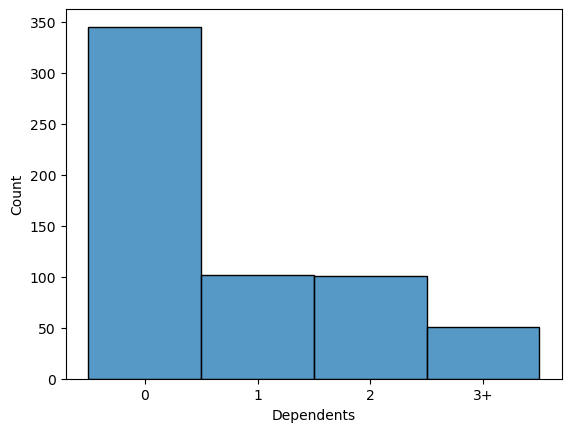

In [10]:
sna.histplot(df['Dependents'])

C:\Users\chahil choudhary\AppData\Local\Temp\ipykernel_25040\3315495561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot(df['LoanAmount'],hist=False)


<Axes: xlabel='LoanAmount', ylabel='Density'>

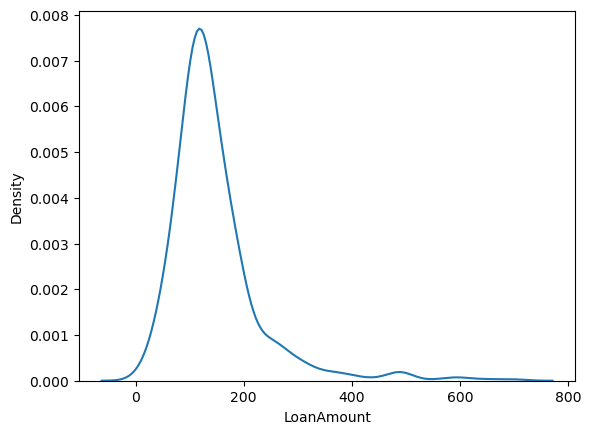

In [11]:
sna.distplot(df['LoanAmount'],hist=False)

C:\Users\chahil choudhary\AppData\Local\Temp\ipykernel_25040\4167696825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot(df['Loan_Amount_Term'],hist=False)


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

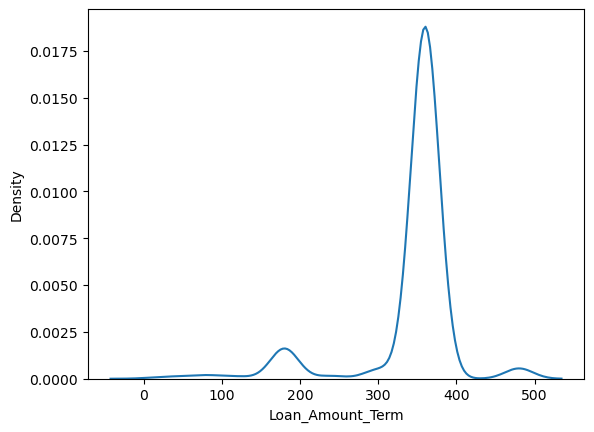

In [12]:
sna.distplot(df['Loan_Amount_Term'],hist=False)

C:\Users\chahil choudhary\AppData\Local\Temp\ipykernel_25040\1851357262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot(df['Credit_History'],hist=False)


<Axes: xlabel='Credit_History', ylabel='Density'>

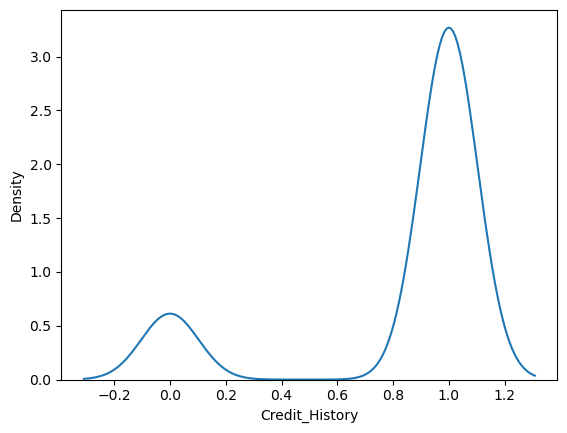

In [13]:
sna.distplot(df['Credit_History'],hist=False)

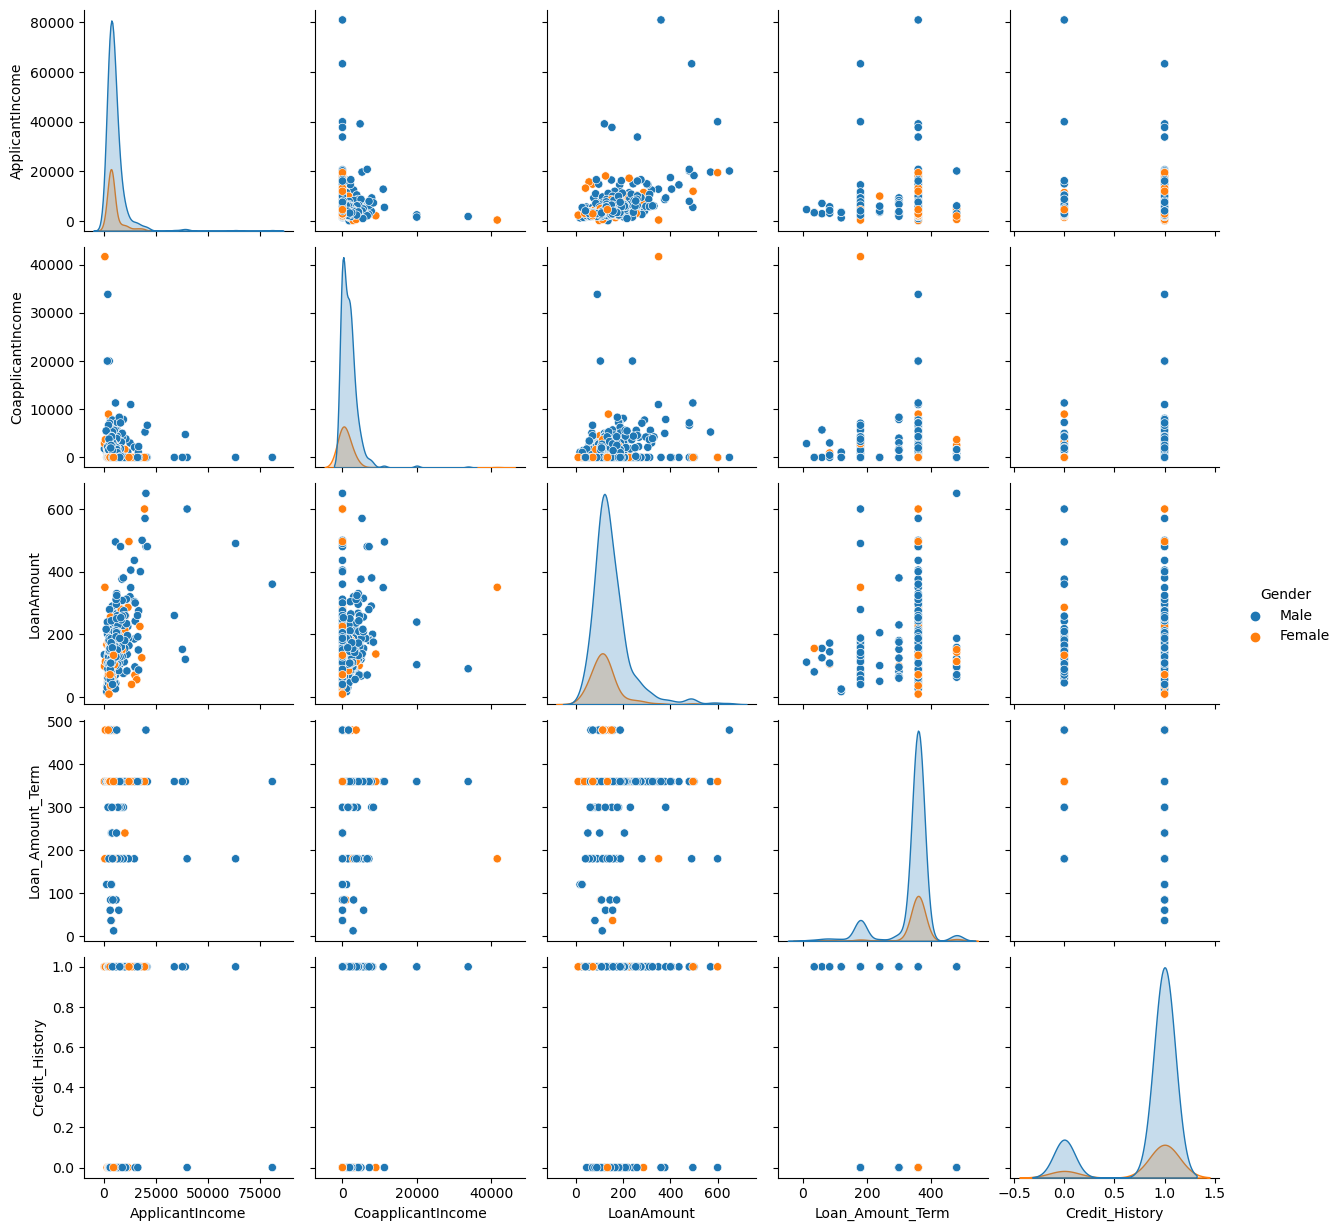

In [14]:
sna.pairplot(df,hue='Gender')

### Removing the misssing values of the Gender column using mode bcz the %age of missing vale is less than <5%

<Axes: >

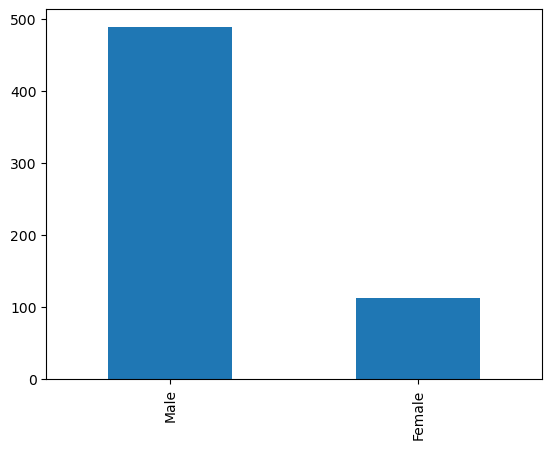

In [15]:
df['Gender'].value_counts().plot(kind='bar')

In [16]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
# Replace missing values in the 'age' column with its mode
imputer = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer.fit_transform(df[['Gender']])


In [18]:
df['Gender'].isnull().sum()

0

### for the married collumn we are using the missing catagories mathod in which we are craeting a new columns 

In [19]:
df['Married'].isnull().mean()*100

0.4885993485342019

In [20]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
df['Married'] = imputer.fit_transform(df[['Married']])

In [21]:
df['Married'].isnull().sum()

0

### For endances column we are using the missing value techiniqe mode imputation

In [22]:
df['Dependents'].isnull().mean()*100

2.44299674267101

In [23]:
imputer1 = SimpleImputer(strategy='most_frequent')
df['Dependents'] = imputer1.fit_transform(df[['Dependents']])

In [24]:
df['Dependents'].isnull().mean()*100

0.0

### for the Self_Employed we are using the imputation by mode bcz it is a catogirical data

In [25]:
df['Self_Employed'].isnull().mean()*100

5.211726384364821

In [26]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']])

In [27]:
df['Self_Employed'].isnull().mean()*100

0.0

### for the LoanAmount we are using the imputation by mean and median bcz it is a numerical  data

In [28]:
df['LoanAmount'].isnull().mean()*100

3.5830618892508146

In [29]:
imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])

In [30]:
df['LoanAmount'].isnull().mean()*100

0.0

### for the Loan_Amount_Term we are using the imputation by mean and median bcz it is a numerical  data

In [31]:
df['Loan_Amount_Term'].isnull().mean()*100

2.2801302931596092

In [32]:
imputer = SimpleImputer(strategy='median')
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])

In [33]:
df['Loan_Amount_Term'].isnull().mean()*100

0.0

### for the Credit_History we are using the imputation by arbatory value imputation bcz it is a numerical data

In [34]:
df['Credit_History'].isnull().mean()*100

8.143322475570033

In [35]:
df['Credit_History'].head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64

In [36]:
imputer1 = SimpleImputer(strategy='constant',fill_value=0.0)
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

In [37]:
df['Credit_History'].isnull().mean()*100

0.0

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# now applying the encoding on the catagorical variables

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
#df['Gender']=le.fit_transform(df[['Gender']])
df['Gender'] = le.fit_transform(df['Gender'])

In [42]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int32

In [43]:
df['Married']=le.fit_transform(df['Married'])

In [44]:
df['Married']

0      1
1      2
2      2
3      2
4      1
      ..
609    1
610    2
611    2
612    2
613    1
Name: Married, Length: 614, dtype: int32

In [45]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,1,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,2,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,2,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,2,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,1,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,1,2,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,1,2,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,1,2,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,1,2,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,1,2,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [46]:
df['Education']=le.fit_transform(df['Education'])

In [47]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [48]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [49]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [50]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [51]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,2,2,0,2,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,2,0,1,1,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,2,3,0,1,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,2,2,0,1,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,2,1,0,1,12841,10968.0,349.000000,360.0,1.0,1,0


In [52]:
df = df.drop(columns=['Loan_ID'])

In [53]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,1,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,1,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
5,1,2,2,0,2,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,2,0,1,1,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,2,3,0,1,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,2,2,0,1,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,2,1,0,1,12841,10968.0,349.000000,360.0,1.0,1,0


In [54]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.362592,0.172914,0.045364,0.021135,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.362592,1.000000,0.339987,0.022530,0.030171,0.047691,0.083270,0.141196,-0.103662,0.002419,-0.003370,0.075547
Dependents,0.172914,0.339987,1.000000,0.055752,0.052597,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.022530,0.055752,1.000000,0.000820,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.021135,0.030171,0.052597,0.000820,1.000000,0.092967,-0.052384,0.082292,-0.017729,-0.041027,-0.028730,-0.011332
ApplicantIncome,0.058809,0.047691,0.118202,-0.140760,0.092967,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.083270,0.030430,-0.062290,-0.052384,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.141196,0.163106,-0.166998,0.082292,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.103662,-0.103864,-0.073928,-0.017729,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.002419,-0.040160,-0.073658,-0.041027,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


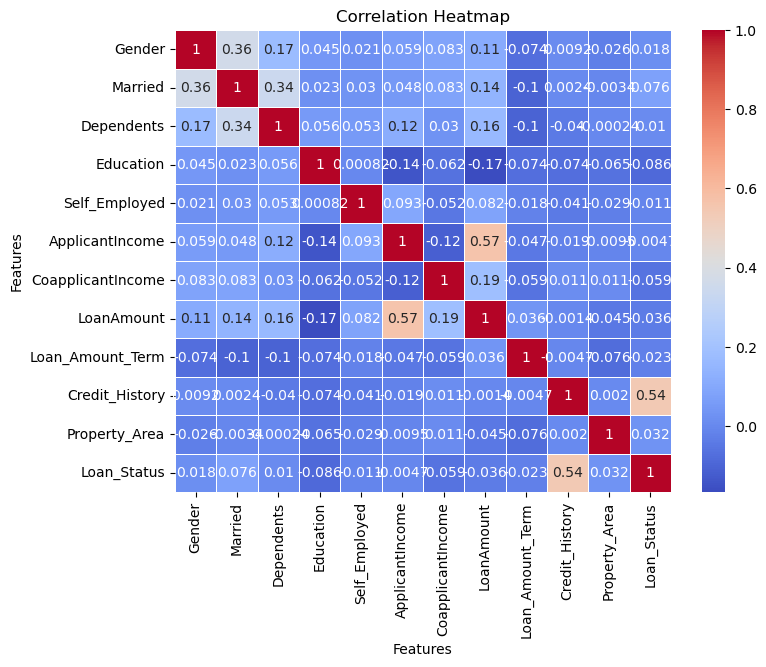

In [55]:
# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sna.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

# model applying

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [57]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [58]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2
1,1,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0
2,1,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2
3,1,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2
4,1,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2


In [59]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(491, 11)

In [62]:
y_train.shape

(491,)

In [63]:
X_test.shape

(123, 11)

In [64]:
y_test.shape

(123,)

In [65]:
rf_classifier = LogisticRegression(random_state=42,max_iter=1000)


In [66]:
rf_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [67]:
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display a classification report with precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [68]:
input_data = [[1,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2]]

# Make predictions on the input data
predictions = rf_classifier.predict(input_data)

# Output the predictions
print("Predicted Class:", predictions)

Predicted Class: [1]


C:\Users\chahil choudhary\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
